#Equipo:10

###Integrantes


* 1856652 Velázquez Montemayor Ofelia

* 1862149 Cruz Martínez Diego Adrian

* 1867216 Martínez Reyes Jose Miguel

* 1941488 García Ortega Jose Andrés 

* 1941564 Ramirez Moreno Diana Gabriela 

###Grupo 001 Lunes


Nombre de la base de datos: COVID-19 World Vaccination Progress


URL de la pagina: https://www.kaggle.com/gpreda/covid-world-vaccination-progress



Objetivo: Proporcionar predicciones para reanudar las actividades cotidianas en México

In [3]:
import pandas as pd
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


covid = pd.read_csv("country_vaccinations.csv")

In [4]:
covid.tail(5)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
48108,Zimbabwe,ZWE,2021-09-26,5234875.0,3036623.0,2198252.0,16203.0,31405.0,34.69,20.12,14.57,2081.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48109,Zimbabwe,ZWE,2021-09-27,5263782.0,3050981.0,2212801.0,28907.0,31282.0,34.88,20.22,14.66,2073.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48110,Zimbabwe,ZWE,2021-09-28,5290317.0,3060086.0,2230231.0,26535.0,29469.0,35.05,20.28,14.78,1953.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48111,Zimbabwe,ZWE,2021-09-29,5320565.0,3071643.0,2248922.0,30248.0,28149.0,35.25,20.35,14.90,1865.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48112,Zimbabwe,ZWE,2021-09-30,5355820.0,3083764.0,2272056.0,35255.0,27045.0,35.49,20.43,15.05,1792.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Comenzaremos seleccionando solo las columnas las cuales nos dan mejor informacion para nuestro objetivo. esto nos permitira visualizar de manera mas sencilla la informacion y evitar fatigarnos de datos.

In [5]:

vacmx = covid[['country','date',"daily_vaccinations_raw",'people_vaccinated', 'people_fully_vaccinated',"people_vaccinated_per_hundred"]]
vacmx['date'] = pd.to_datetime(vacmx['date'],)
vacmx = vacmx.set_index('date')
vacmx


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,daily_vaccinations_raw,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred
date,,,,,
2021-02-22,Afghanistan,NaN,0.0,NaN,0.00
2021-02-23,Afghanistan,NaN,NaN,NaN,NaN
2021-02-24,Afghanistan,NaN,NaN,NaN,NaN
2021-02-25,Afghanistan,NaN,NaN,NaN,NaN
2021-02-26,Afghanistan,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-09-26,Zimbabwe,16203.0,3036623.0,2198252.0,20.12
2021-09-27,Zimbabwe,28907.0,3050981.0,2212801.0,20.22
2021-09-28,Zimbabwe,26535.0,3060086.0,2230231.0,20.28


In [6]:
vacmx.isnull().any()

country                          False
daily_vaccinations_raw            True
people_vaccinated                 True
people_fully_vaccinated           True
people_vaccinated_per_hundred     True
dtype: bool

In [7]:
vacmx.isnull().sum()

country                              0
daily_vaccinations_raw           26485
people_vaccinated                23120
people_fully_vaccinated          26051
people_vaccinated_per_hundred    23120
dtype: int64

Revisando, podemos ver que existen diferentes columnas las cuales contienen cierta cantidad de valores nulos los cuales debemos de saber manejar. En el caso de personas que ya estan completamente vacunadas podemos inferir que el NA interpreta que en ese momento todavia no se completaba la vacunacion para las personas debido al tiempo de espera entre la primera y segunda dosis por lo cual remplazaremos con 0 estos datos.

In [8]:
vacmx1=vacmx.fillna({"people_fully_vaccinated" : 0})
vacmx1

,country,daily_vaccinations_raw,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred
date,,,,,
2021-02-22,Afghanistan,NaN,0.0,0.0,0.00
2021-02-23,Afghanistan,NaN,NaN,0.0,NaN
2021-02-24,Afghanistan,NaN,NaN,0.0,NaN
2021-02-25,Afghanistan,NaN,NaN,0.0,NaN
2021-02-26,Afghanistan,NaN,NaN,0.0,NaN
...,...,...,...,...,...
2021-09-26,Zimbabwe,16203.0,3036623.0,2198252.0,20.12
2021-09-27,Zimbabwe,28907.0,3050981.0,2212801.0,20.22
2021-09-28,Zimbabwe,26535.0,3060086.0,2230231.0,20.28


Las demas columnas no podemos saber realmente porque tenemos estos valores nulos por lo cual decidiremos eliminar las filas que los contengan

In [9]:
vacmx2=vacmx1.dropna()

Cambiamos nombres de columnas para facilitar la intentificacion de los datos

In [10]:
vacmx2.rename(columns={'daily_vaccinations_raw':'Vacunacion_por_dia'}, inplace = True)
vacmx2.rename(columns={'people_vaccinated':'Personas_vacunadas'},inplace = True)
vacmx2.rename(columns={'people_fully_vaccinated':'Personas_con_vacunacion_completa'},inplace = True)
vacmx2.rename(columns={'people_vaccinated_per_hundred':'Porcentaje_de_personas_vacunadas'},inplace = True)
vacmx2.rename(columns={'country':'Pais'},inplace = True)
vacmx2[['Pais']].infer_objects()
vacmx2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Pais,Vacunacion_por_dia,Personas_vacunadas,Personas_con_vacunacion_completa,Porcentaje_de_personas_vacunadas
date,,,,,
2021-05-27,Afghanistan,2859.0,479574.0,113739.0,1.20
2021-06-03,Afghanistan,4015.0,481800.0,148505.0,1.21
2021-01-13,Albania,60.0,188.0,0.0,0.01
2021-01-14,Albania,78.0,266.0,0.0,0.01
2021-01-15,Albania,42.0,308.0,0.0,0.01


##Estadisticos descriptivos

In [11]:
vacmx2.groupby('Pais')['Vacunacion_por_dia'].mean().nlargest(10)


Pais
China            1.139700e+07
India            3.447852e+06
United States    1.491913e+06
Brazil           8.964156e+05
Pakistan         8.786509e+05
Japan            8.100860e+05
Indonesia        6.845358e+05
Iran             4.652125e+05
Turkey           4.651603e+05
Russia           4.199178e+05
Name: Vacunacion_por_dia, dtype: float64

Podemos apreciar que en promedio China, India y Estados Unidos son los paises que mas aplican vacunas al dia.


In [12]:
vacmx2.groupby('Pais')['Vacunacion_por_dia'].std().nlargest(10)

Pais
China            7.874154e+06
India            3.061839e+06
United States    9.356284e+05
Bangladesh       8.059864e+05
Brazil           7.974803e+05
Japan            7.682963e+05
Iran             6.931238e+05
Indonesia        5.996735e+05
Pakistan         3.759296e+05
Russia           3.564990e+05
Name: Vacunacion_por_dia, dtype: float64

A continuacion se ve cual es la desviacion estandar entre paises y podemos ver que china es quien por diferencia tiene  la mayor

In [13]:
vacmx2.groupby('Pais')['Personas_con_vacunacion_completa'].max().nlargest(10)

Pais
China             1.022207e+09
India             2.374762e+08
United States     1.846014e+08
Brazil            8.898374e+07
Japan             7.570436e+07
Germany           5.368339e+07
Indonesia         5.111336e+07
Mexico            4.557252e+07
United Kingdom    4.486737e+07
France            4.440873e+07
Name: Personas_con_vacunacion_completa, dtype: float64

Podemos ver que estos mismos paises son los que cuentan con la mayor cantidad de personas que ya tienen dosis completa de la vacuna

In [14]:
vacmx2.groupby('Pais')['Vacunacion_por_dia'].mean().nsmallest(10)

Pais
Algeria              30.000000
Liechtenstein       166.736655
Nauru               168.000000
Grenada             345.666667
Saint Lucia         360.880000
San Marino          371.240741
Cameroon            400.000000
French Polynesia    427.500000
Gambia              429.000000
Cayman Islands      506.931034
Name: Vacunacion_por_dia, dtype: float64

In [15]:
vacmx2.groupby('Pais')['Vacunacion_por_dia'].std().nlargest(10)

Pais
China            7.874154e+06
India            3.061839e+06
United States    9.356284e+05
Bangladesh       8.059864e+05
Brazil           7.974803e+05
Japan            7.682963e+05
Iran             6.931238e+05
Indonesia        5.996735e+05
Pakistan         3.759296e+05
Russia           3.564990e+05
Name: Vacunacion_por_dia, dtype: float64

Tenemos ahora los datos alarmantes de los paises los cuales no han podido tener un plan de vacunacion exitoso debido a su situacion actual como nacion.

In [16]:
vacmx2['Vacunacion_por_dia'].skew()

12.731554141214215

Como el coeficiente es positivo, nos dice que hay una asimetría positiva. Esto significa que los datos estan sesgados a la izquierda.

In [17]:
vacmx2.corr()

,Vacunacion_por_dia,Personas_vacunadas,Personas_con_vacunacion_completa,Porcentaje_de_personas_vacunadas
Vacunacion_por_dia,1.000000,0.818468,0.576767,0.048617
Personas_vacunadas,0.818468,1.000000,0.871226,0.149539
Personas_con_vacunacion_completa,0.576767,0.871226,1.000000,0.224238
Porcentaje_de_personas_vacunadas,0.048617,0.149539,0.224238,1.000000


In [18]:
vacmx2.cov()

,Vacunacion_por_dia,Personas_vacunadas,Personas_con_vacunacion_completa,Porcentaje_de_personas_vacunadas
Vacunacion_por_dia,3.602370e+11,1.920913e+13,7.427623e+12,7.215140e+05
Personas_vacunadas,1.920913e+13,1.529056e+15,7.309673e+14,1.445864e+08
Personas_con_vacunacion_completa,7.427623e+12,7.309673e+14,4.603743e+14,1.189665e+08
Porcentaje_de_personas_vacunadas,7.215140e+05,1.445864e+08,1.189665e+08,6.113926e+02


##Visualizacion


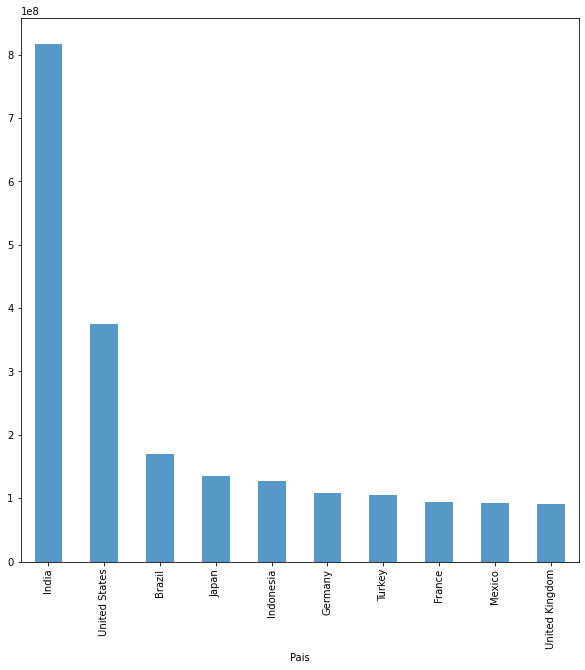

In [19]:
vacmx3=vacmx2.groupby("Pais")["Vacunacion_por_dia"].sum().nlargest(10)
plt.figure(figsize=(10,10))
vacmx3.plot(x = "Pais", kind = 'bar', alpha = 0.75)



Dentro de la grafica podemos notar la cantidad de vacunas que se han aplicado dentro de los 10 paises con mayor cantidad de vacunas aplicadas. Es muy notable como India es que tiene el dato mayor, esto puede ser debido a su alta cantidad de poblacion.

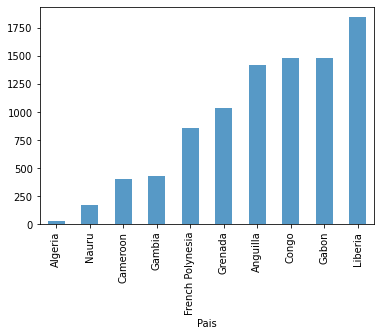

In [20]:
vacmx3=vacmx2.groupby("Pais")["Vacunacion_por_dia"].sum().nsmallest(10)
vacmx3.plot(x = "Pais", kind = 'bar', alpha = 0.75)


In [21]:
India=vacmx2[vacmx2['Pais']=="India"]

US=vacmx2[vacmx2['Pais']=="United States"]
Brasil=vacmx2[vacmx2['Pais']=="Brazil"]
Japon=vacmx2[vacmx2['Pais']=="Japan"]
Indonesia=vacmx2[vacmx2['Pais']=="Indonesia"]
Mexico=vacmx2[vacmx2['Pais']=="Mexico"]

Text(0.5, 1.0, 'Estados Unidos V.S. India')

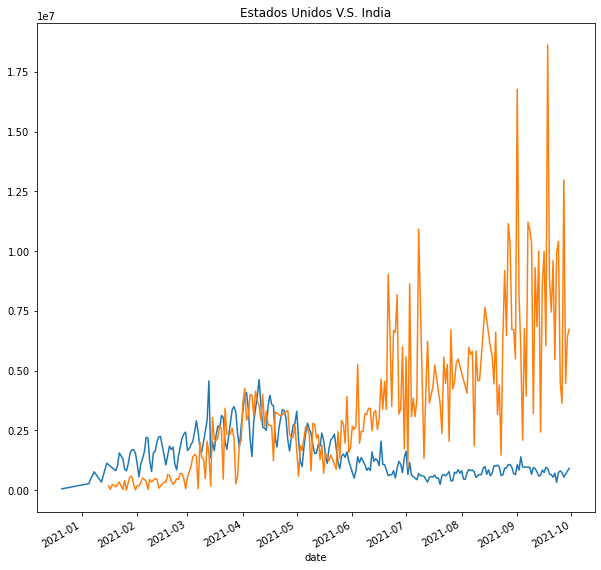

In [22]:
plt.figure(figsize=(10,10))
US['Vacunacion_por_dia'].plot.line()
India['Vacunacion_por_dia'].plot.line()
plt.title("Estados Unidos V.S. India")


Dentro del grafico de lineas podemos ver como ha sido la vacunacion de los dos punteros, EUA (azul) e India(naranja), dponde podemos ver al paso del tiempo la cantidad de vacunas que han estado aplicando.

Text(0.5, 1.0, 'Estados Unidos V.S. Mexico')

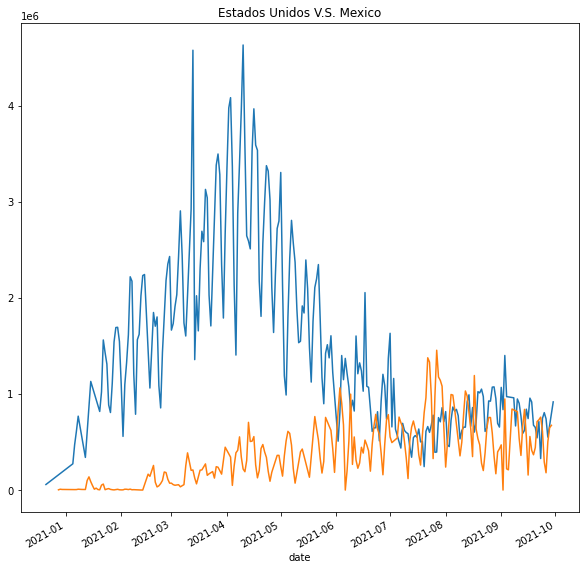

In [24]:
plt.figure(figsize=(10,10))
US['Vacunacion_por_dia'].plot.line()
Mexico['Vacunacion_por_dia'].plot.line()
plt.title("Estados Unidos V.S. Mexico")

Podemos tambien nosotros como Mexicanos ver como se ha llevado el proceso de vacunacion con nuestro vecino mas cercano, EUA (azul)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 1080x1080 with 0 Axes>

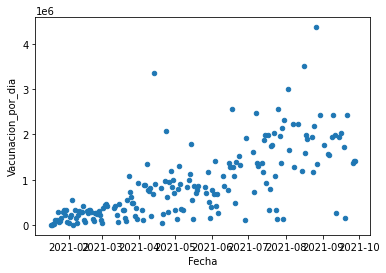

In [25]:
Brasil['Fecha']= Brasil.index
plt.figure(figsize=(15,15))
Brasil.plot.scatter(x='Fecha',y='Vacunacion_por_dia')

Tenemos el grafico de dispersion el cual es otra manera de revisar como se ha estado llevando la vacunacion a traves del tiempo, para este caso tenemos a Brasil

Text(0.5, 1.0, 'Top 5 paises vacunacion')

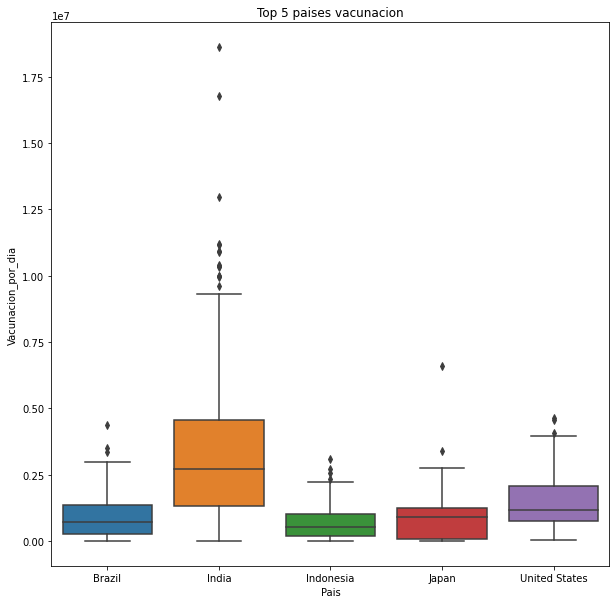

In [30]:

top5=vacmx2[vacmx2['Pais'].isin(["India","United States","Brazil","Indonesia","Japan"])]
plt.figure(figsize=(10,10))
sns.boxplot(
    x="Pais",
    y="Vacunacion_por_dia",
    data= top5
)
plt.title("Top 5 paises vacunacion")

Tenemos ahora el grafico de caja el cual es muy importante debido a que nos permite comparar de mejor manera los paises y sus estadisticos. Por ejemplo podemos apreciar que India cuenta con el promedio mas alto de todos seguido EUA.  Es interesante de igual manera ver como Japon cuenta con una media mas cerca al 3 cuartil.

Text(0.5, 1.0, 'Paises latinoamericanos')

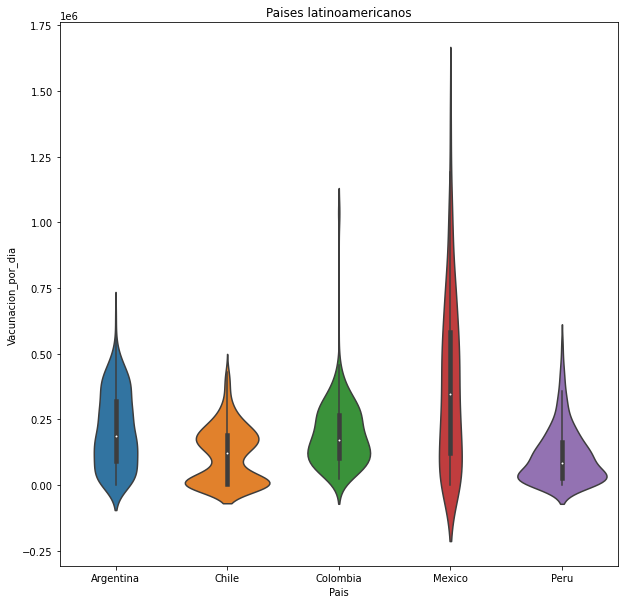

In [29]:
Bottom5=vacmx2[vacmx2['Pais'].isin(["Mexico","Argentina","Chile","Colombia","Peru"])]
plt.figure(figsize=(10,10))
sns.violinplot(
    x="Pais",
    y="Vacunacion_por_dia",
    data= Bottom5
)
plt.title("Paises latinoamericanos")

El grafico de violin es muy parecido al cuadro de caja pero sin los bigotes. En este caso comparamos algunos de los paise mas importantes de Latinoamerica

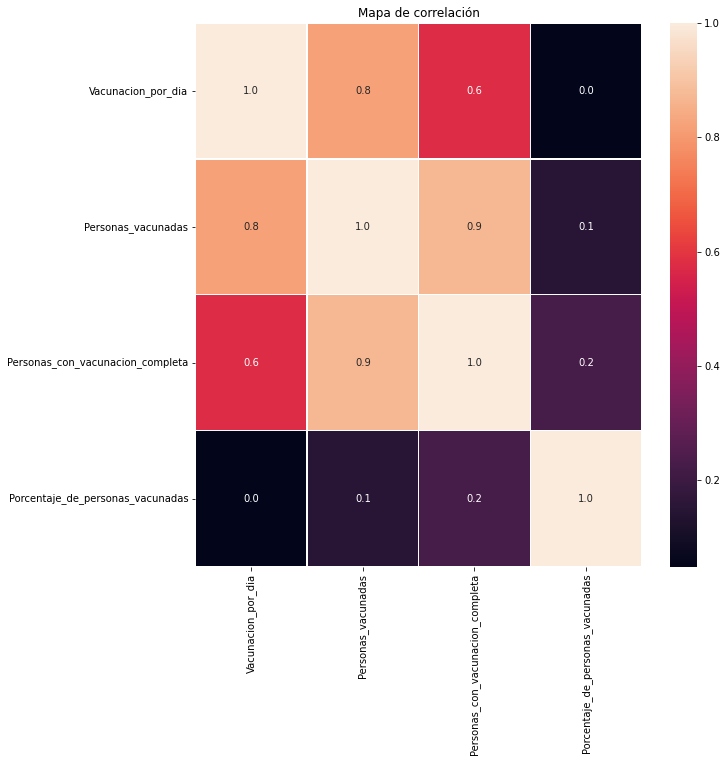

In [28]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(vacmx2.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Con este grafico podemos observar como estan correlacionadas y que tanto las variables de nuestra base de datos.

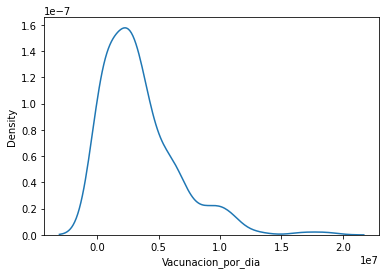

In [32]:
sns.kdeplot(India['Vacunacion_por_dia'])


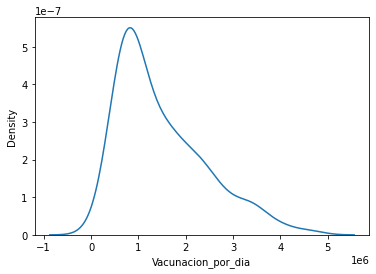

In [33]:
sns.kdeplot(US['Vacunacion_por_dia'])

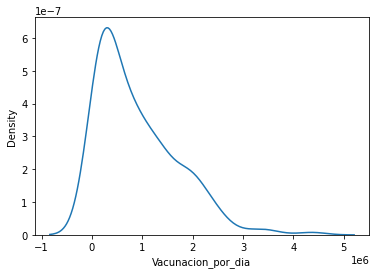

In [34]:
sns.kdeplot(Brasil['Vacunacion_por_dia'])

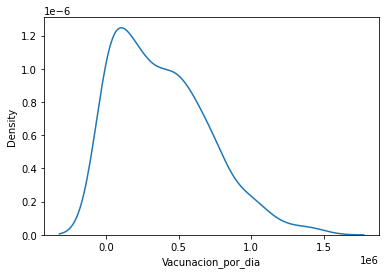

In [35]:
sns.kdeplot(Mexico['Vacunacion_por_dia'])

Con estos graficos podemos apreciar la razon por la cual los primeros lugares estan en esos puestos. podemos ver que se comportan de una manera muy similar teniendo una media muy alta la cual se presenta muy frecuentemente y con una caida de valores positivos muy alta por lo cual existen dias los cuales se realizan muchas mas vacunas. Podemos tambien comparar con la grafica de Mexico la cual muestra una media no tan alta ademas de que las caidas son mas pendientes por lo cual no existen intervalos muy grandes.

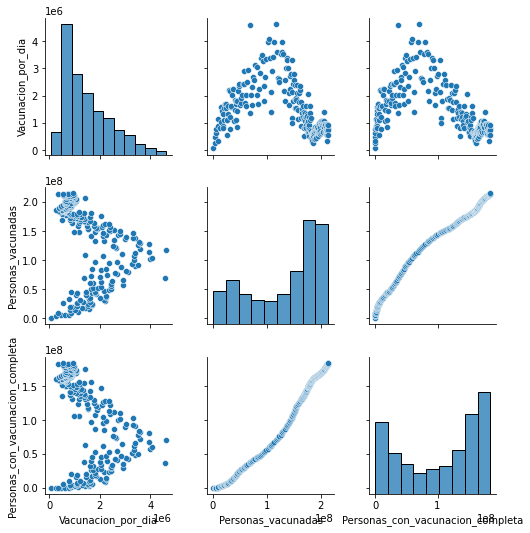

In [36]:
sns.pairplot(US[['Vacunacion_por_dia','Personas_vacunadas','Personas_con_vacunacion_completa']])

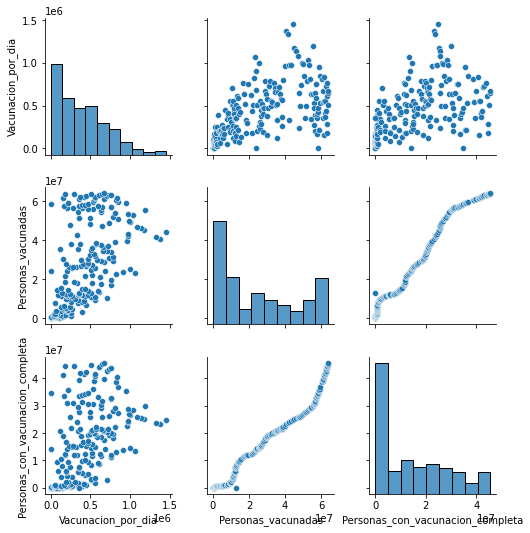

In [37]:
sns.pairplot(Mexico[['Vacunacion_por_dia','Personas_vacunadas','Personas_con_vacunacion_completa']])

Dentro de estas graficas podemos ver de manera grafica como se relacionan nuestras 3 variables entre si para cada upais, en este caso podemos ver como se comportan tanto en EUA y Mexico. Se puede apreciar como en EUA se meustra una relacion mas estable entre las variables mientras que en Mexico se presenta un poco mas de inestabilidad.
